
# Multiple Linear Regression
```



**Objective:**

Predict the selling price of used cars based on multiple attributes (features) using Multiple Linear Regression (MLR).

**Target Variable:**
Selling_Price: Price the car is being sold at (in lakhs INR)

**Independent Variables (Features):**

Year – Year of car purchase (used to derive car age)

Present_Price – Price of the car when bought new

Kms_Driven – Distance driven (numeric)

Fuel_Type – Petrol / Diesel / CNG (categorical)

Seller_Type – Dealer / Individual (categorical)

Transmission – Manual / Automatic (categorical)

Owner – Number of previous owners

Derived feature:

Car_Age = Current_Year - Year

**Libraries Installation**

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('car_data.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
# Clean and preprocess data for modeling and visualization
df.drop(columns=["name", "torque"], inplace=True, errors='ignore')
df['mileage'] = df['mileage'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
df['engine'] = df['engine'].str.extract(r'(\d+)').astype(float)
df['max_power'] = df['max_power'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
df['car_age'] = 2025 - df['year']
df.drop(columns=["year"], inplace=True)
df.dropna(subset=["selling_price"], inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)

Text(0, 0.5, 'Frequency')

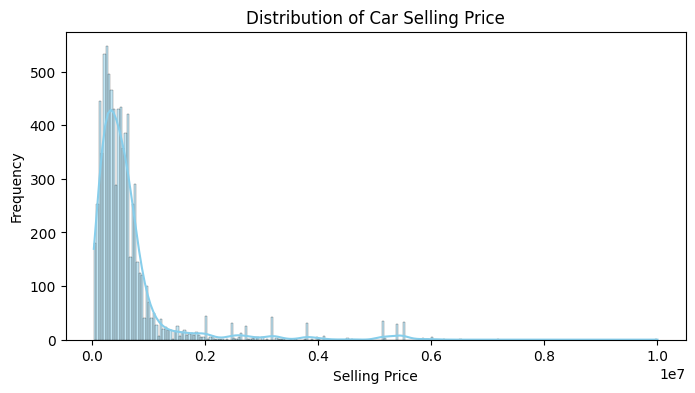

In [4]:
# 1. Distribution of Selling Price
plt.figure(figsize=(8, 4))
sns.histplot(df["selling_price"], kde=True, color='skyblue')
plt.title("Distribution of Car Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")

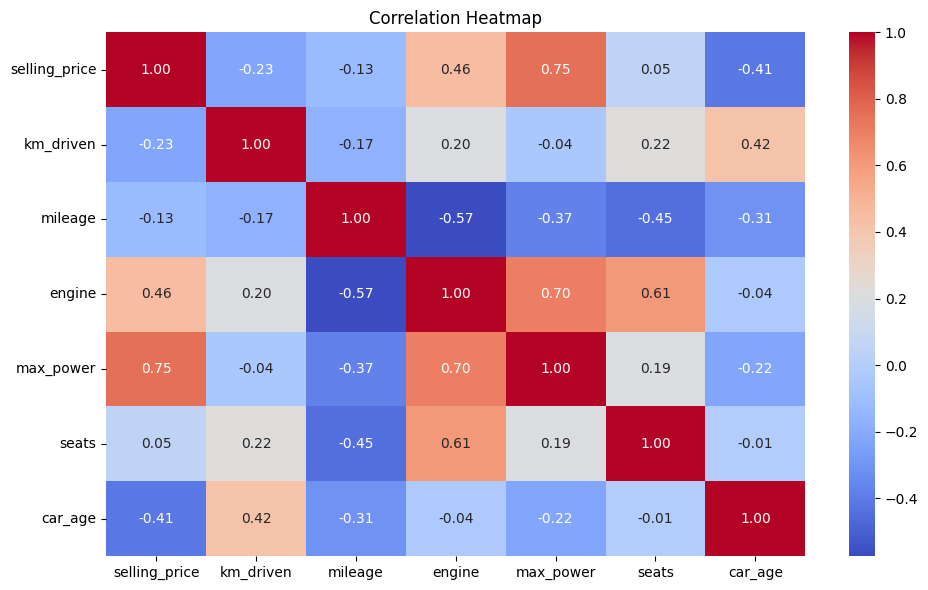

In [5]:
# 2. Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

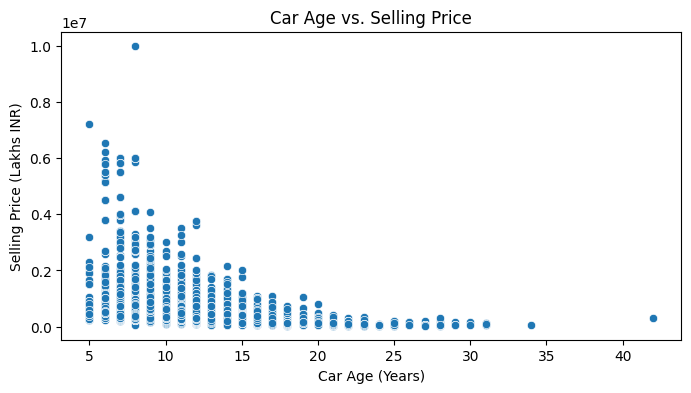

In [6]:
# 3. Relationship between Car Age and Selling Price
plt.figure(figsize=(8, 4))
sns.scatterplot(x='car_age', y='selling_price', data=df)
plt.title("Car Age vs. Selling Price")
plt.xlabel("Car Age (Years)")
plt.ylabel("Selling Price (Lakhs INR)")
plt.show()

In [7]:
# Drop rows with missing target
df.dropna(subset=["selling_price"], inplace=True)

# Fill remaining missing values
df.fillna(df.median(numeric_only=True), inplace=True)

In [8]:
#  Feature Selection
X = df[['km_driven', 'mileage', 'engine', 'max_power', 'seats', 'car_age']]
y = df['selling_price']

In [9]:
#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Build and Train Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Make Predictions
y_pred = model.predict(X_test)

In [12]:
 # Evaluation Metrics
print("📈 Model Performance:")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):,.2f}")

📈 Model Performance:
R² Score: 0.6559
MSE: 225,562,117,866.74


In [13]:
# Coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\n📊 Feature Coefficients:")
print(coeff_df)


📊 Feature Coefficients:
     Feature   Coefficient
0  km_driven     -1.321975
1    mileage   9562.097427
2     engine    108.816980
3  max_power  15574.367494
4      seats -75972.656295
5    car_age -39892.033644


In [15]:
r2 = r2_score(y_test, y_pred)
print(f"R² Score (accuracy-style): {r2:.4f}")

R² Score (accuracy-style): 0.6559
